In [1]:
#import das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# 1 -  Análise RFV
Neste tópico vamos explorar os seguintes pontos:
1. Seleção das Variáveis
2. Cálculo dos Scores RFV
3. Atribuição dos Seguimentos

In [2]:
# carreagando os dados tratados
df_gold = pd.read_csv("tabela_gold.csv")
df_gold.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id
0,489460,79323P,PINK CHERRY LIGHTS,8,2009-01-12 10:46:00,6.75,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
1,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
2,489460,84991,60 TEATIME FAIRY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167


In [3]:
df_gold.describe()

,Quantity,Price,Customer.ID,gender,age,annual.Salary,credit.card.debt,net.worth,client_id
count,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000
mean,9.456187,3.526992,15350.695065,0.655275,43.946600,62252.825399,10836.350457,407499.142017,15350.695065
std,21.838293,23.429281,1614.261039,0.475282,8.092589,11308.634109,4951.553315,152655.979293,1614.261039
min,-1200.000000,0.000000,12348.000000,0.000000,20.000000,20000.000000,100.000000,20000.000000,12348.000000
25%,2.000000,1.250000,14211.000000,0.000000,36.000000,54912.440430,7557.657205,335809.617100,14211.000000
50%,6.000000,1.950000,15005.000000,1.000000,43.000000,64412.431010,10279.912640,390312.171500,15005.000000
75%,12.000000,3.750000,16830.000000,1.000000,50.000000,69494.697830,13102.158050,522814.817000,16830.000000
max,2160.000000,4217.590000,18287.000000,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,18287.000000


Podemos observar que os dados estão agregados por transação e não por cliente, este é um ponto que devemos pretar atenção.



In [4]:
df_gold

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id
0,489460,79323P,PINK CHERRY LIGHTS,8,2009-01-12 10:46:00,6.75,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
1,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
2,489460,84991,60 TEATIME FAIRY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
3,489460,22274,FELTCRAFT DOLL EMILY,6,2009-01-12 10:46:00,2.95,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
4,489460,22273,FELTCRAFT DOLL MOLLY,6,2009-01-12 10:46:00,2.95,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79789,579258,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-11-29 08:21:00,0.12,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148
79790,579258,82616B,FRAPPUCINO SCARF KNITTING KIT,12,2011-11-29 08:21:00,1.25,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148
79791,579258,20971,PINK BLUE FELT CRAFT TRINKET BOX,12,2011-11-29 08:21:00,1.25,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148
79792,579258,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,12,2011-11-29 08:21:00,0.85,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148


In [5]:
# Temos 8 obs com price igual a zero.
np.sum(df_gold['Price']==0)

8

### 1. Seleção de variáveis

Para o cálculo dos seguimentos RFV (**Recência, Frequência e Valor**) precisamos selecionar colunas associoadas a essas métricas.

Lembrando que:

- **Recência**: Tempo entre a data presente a última compra.
- **Frequência**: Número de transações.
- **Valor**: Valor total gasto pelo cliente.

In [6]:
# Para análise RFV iremos criar um df com as colunas "Invoice", "Quantity", "InvoiceDate", "Price" e "Customer.ID"

df_vendas = df_gold[["Invoice", "Quantity", "InvoiceDate","Price", "Customer.ID"]]
df_vendas.head()

,Invoice,Quantity,InvoiceDate,Price,Customer.ID
0,489460,8,2009-01-12 10:46:00,6.75,16167
1,489460,24,2009-01-12 10:46:00,0.55,16167
2,489460,24,2009-01-12 10:46:00,0.55,16167
3,489460,6,2009-01-12 10:46:00,2.95,16167
4,489460,6,2009-01-12 10:46:00,2.95,16167


Podemos observar que a variável "**InvoiceDate**" não está no formato data

In [7]:
df_vendas.dtypes



Invoice         object
Quantity         int64
InvoiceDate     object
Price          float64
Customer.ID      int64
dtype: object

In [8]:
#transformar invocedate em data e configurar a data "presente", valor maximo da base

PRESENT = dt.datetime(2011,12,10)
df_vendas['InvoiceDate'] = pd.to_datetime(df_vendas['InvoiceDate'])
df_vendas.dtypes

Invoice                object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer.ID             int64
dtype: object

In [9]:
# Criar uma coluna de total price

df_vendas['total_price']= df_vendas['Quantity'] * df_vendas['Price']
df_vendas

,Invoice,Quantity,InvoiceDate,Price,Customer.ID,total_price
0,489460,8,2009-01-12 10:46:00,6.75,16167,54.00
1,489460,24,2009-01-12 10:46:00,0.55,16167,13.20
2,489460,24,2009-01-12 10:46:00,0.55,16167,13.20
3,489460,6,2009-01-12 10:46:00,2.95,16167,17.70
4,489460,6,2009-01-12 10:46:00,2.95,16167,17.70
...,...,...,...,...,...,...
79789,579258,24,2011-11-29 08:21:00,0.12,15148,2.88
79790,579258,12,2011-11-29 08:21:00,1.25,15148,15.00
79791,579258,12,2011-11-29 08:21:00,1.25,15148,15.00
79792,579258,12,2011-11-29 08:21:00,0.85,15148,10.20


#### 2. Cálculo dos Scores RFV
Nesta etapa vamos agrupar os nosso dados em 3 colunas, R, F e V e atribuir scores de acordo com o seu respectivo quartil.

In [10]:
# Inicio do RFV

rfv = df_vendas.groupby('Customer.ID').agg( {'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                            'Invoice':lambda num: len(num),
                                            'total_price': lambda price: price.sum()
                                            })
rfv.head()

,InvoiceDate,Invoice,total_price
Customer.ID,,,
12348,75,51,2019.40
12349,18,180,4404.54
12361,287,29,511.25
12375,10,17,457.50
12410,37,42,1001.46


In [11]:
# Vamos renomear as colunas e arrumar os dados
rfv.columns=['recencia','frequencia','valor']
rfv['recencia'] = rfv['recencia'].astype(int)
rfv['frequencia'] = rfv['frequencia'].astype(int)
rfv['valor'] = rfv['valor'].astype(float)

rfv.head()

,recencia,frequencia,valor
Customer.ID,,,
12348,75,51,2019.40
12349,18,180,4404.54
12361,287,29,511.25
12375,10,17,457.50
12410,37,42,1001.46


Vamos utilizar o quartil para alocar os scores, vamos deixar todos os scores em formato string "str".

In [12]:
r_labels = range(4, 0, -1) # Incremento de -1
r_groups = pd.qcut(rfv['recencia'], q=4, labels=r_labels)
rfv = rfv.assign(R = r_groups.values)


f_labels = range(1, 5)
f_groups = pd.qcut(rfv['frequencia'].rank(method='first'), q=4, labels=f_labels)
rfv = rfv.assign(F = f_groups.values)


v_labels = range(1, 5)
v_groups = pd.qcut(rfv['valor'], q=4, labels=v_labels)
rfv = rfv.assign(V = v_groups.values)

rfv['R'] = rfv['R'].astype(str)
rfv['F'] = rfv['F'].astype(str)
rfv['V'] = rfv['V'].astype(str)

Vamos criar os seguimentos concatetendo os scores

In [13]:
# Função que concatena os valores
def join_rfv(x): return str(x['R']) + str(x['F']) + str(x['V'])


rfv['rfv_Segmento'] = rfv.apply(join_rfv, axis=1)

rfv.head()

,recencia,frequencia,valor,R,F,V,rfv_Segmento
Customer.ID,,,,,,,
12348,75,51,2019.40,3,2,3,323
12349,18,180,4404.54,4,4,4,444
12361,287,29,511.25,2,2,2,222
12375,10,17,457.50,4,1,2,412
12410,37,42,1001.46,3,2,3,323


In [14]:
# Temos 49 seguimentos diferentes
rfv_count_unique = rfv.groupby('rfv_Segmento')['rfv_Segmento'].nunique()
print(rfv_count_unique.sum())

49


In [15]:
# Temos as seguintes combinações
rfv['rfv_Segmento'].value_counts().to_dict()

{'444': 56,
 '111': 52,
 '344': 31,
 '233': 25,
 '222': 23,
 '211': 21,
 '122': 18,
 '322': 17,
 '433': 16,
 '333': 15,
 '121': 13,
 '133': 11,
 '311': 11,
 '334': 10,
 '112': 10,
 '323': 10,
 '223': 10,
 '232': 10,
 '411': 9,
 '434': 9,
 '244': 8,
 '221': 7,
 '212': 7,
 '243': 7,
 '443': 7,
 '312': 6,
 '422': 6,
 '132': 6,
 '432': 6,
 '332': 5,
 '343': 5,
 '123': 5,
 '423': 5,
 '231': 4,
 '442': 4,
 '324': 4,
 '234': 4,
 '321': 4,
 '143': 3,
 '413': 3,
 '412': 3,
 '421': 2,
 '113': 2,
 '431': 2,
 '342': 2,
 '314': 1,
 '242': 1,
 '134': 1,
 '144': 1}

### 3. Atribuição dos Seguimentos

Nesta etapa iremos atribuir os seguimento com base nos scores calculados na etapa anterior. Ao todo serão 10 seguimentos, serão eles:

- **Campeões**: Compram regularmente, com alta frequência e gastam mais. 

- **Leais**: Compram regularmente. Responsivo a promoções. 
- **Promissor**: Compradores recentes, mas não gastam muito. 
- **Novos**: Compradores recentes, mas apenas com uma transação. 
- **Atenção**: Tempo para retorno, frequência e valores monetários acima da média. Pode não ter comprado muito recentemente. 
- **Quase Dormindo**: Recência e frequência abaixo da média. Vai perdê-los se não for reativado. 
- **Em Risco**: Comprava com frequência, necessário trazê-lo de volta! 
- **Não Perder**: Costumavam comprar com frequência, mas não retornam a muito tempo. 
- **Perdido**: Não compram há muito tempo, em geral não gastam muito. 
- **Comprador de Item**: Comprou recentemente e com frequência, mas não gasta dinheiro. 


In [16]:
# Vamos criar uma função para essa classificação.

def rfv_seguimento(df):
    if df['rfv_Segmento'] in ['444', '434', '443', '433']:
        return 'Campeões'
    elif df['rfv_Segmento'] in ['344', '334', '333', '432', '332', '442', '342', '343']:
        return 'Leais'
    elif df['rfv_Segmento'] in ['424', '324', '423', '323', '422', '322', '421', '321']:
        return 'Promissor'
    elif df['rfv_Segmento'] in ['314', '312', '411', '311', '414', '413', '313', '412']:
        return 'Novos'
    elif df['rfv_Segmento'] in ['232', '234', '233', '244', '243']:
        return 'Atenção'
    elif df['rfv_Segmento'] in ['222', '224', '213', '221', '212', '211', '214']:
        return 'Quase Dormindo'
    elif df['rfv_Segmento'] in ['242', '241', '231', '223']:
        return 'Em Risco'
    elif df['rfv_Segmento'] in ['144', '134', '124', '143', '133', '123', '142', '132']:
        return 'Não Perder'
    elif df['rfv_Segmento'] in ['441', '431', '331', '341']:
        return 'Comprador de Item'
    else:
        return 'Perdido'


In [17]:
# Vamos aplicar essa função ao nosso data frame rfv. 

rfv['rfv_perfil'] = rfv.apply(rfv_seguimento, axis = 1) ## axis = 1 indica que faremos a operação a nível linha.
rfv.head()

,recencia,frequencia,valor,R,F,V,rfv_Segmento,rfv_perfil
Customer.ID,,,,,,,,
12348,75,51,2019.40,3,2,3,323,Promissor
12349,18,180,4404.54,4,4,4,444,Campeões
12361,287,29,511.25,2,2,2,222,Quase Dormindo
12375,10,17,457.50,4,1,2,412,Novos
12410,37,42,1001.46,3,2,3,323,Promissor


In [18]:
# Temos essa distribuição por seguimento
rfv['rfv_perfil'].value_counts().to_dict()

{'Perdido': 95,
 'Campeões': 88,
 'Leais': 78,
 'Quase Dormindo': 58,
 'Atenção': 54,
 'Promissor': 48,
 'Novos': 33,
 'Não Perder': 27,
 'Em Risco': 15,
 'Comprador de Item': 2}

Vamos levar a coluna *rfv_perfil* para o nosso data frame original com o método **merge**

In [19]:
df_gold = pd.merge(df_gold, rfv['rfv_perfil'], how= 'left', on= 'Customer.ID')
df_gold

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id,rfv_perfil
0,489460,79323P,PINK CHERRY LIGHTS,8,2009-01-12 10:46:00,6.75,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,Não Perder
1,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,Não Perder
2,489460,84991,60 TEATIME FAIRY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,Não Perder
3,489460,22274,FELTCRAFT DOLL EMILY,6,2009-01-12 10:46:00,2.95,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,Não Perder
4,489460,22273,FELTCRAFT DOLL MOLLY,6,2009-01-12 10:46:00,2.95,16167,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,Não Perder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79789,579258,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-11-29 08:21:00,0.12,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148,Novos
79790,579258,82616B,FRAPPUCINO SCARF KNITTING KIT,12,2011-11-29 08:21:00,1.25,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148,Novos
79791,579258,20971,PINK BLUE FELT CRAFT TRINKET BOX,12,2011-11-29 08:21:00,1.25,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148,Novos
79792,579258,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,12,2011-11-29 08:21:00,0.85,15148,Jorden I. Whitley,turpis@orci.com,Italy,0,37,49346.40500,5827.820346,479685.9824,15148,Novos


Vamos gerar uma tabela **tabela_gold_rfv** para futuras análises.

In [20]:
df_gold.to_csv('tabela_gold_rfv.csv')

# 2. Análises estatísticas

Vamos explorar os seguintes tópicos nesta parte:

1. **Medidas descritivas**
2. **Teste de hipóteste**
3. **Cálculo de probabilidades**
4. **Intervalo de confiança**

### 1. Medidas descritivas

Podemos verificar algumas medidas descritivas de tendêmcia central e de dispersão do nosso dataframe **RFV**

In [21]:
# Média = Mean
# Desvio Padrão = std

rfv_perfil_agg = rfv.groupby('rfv_perfil').agg({
    'recencia': ['mean', 'std'],
    'frequencia': ['mean', 'std'],
    'valor': ['mean', 'std']
}).round(2)

print(rfv_perfil_agg)

                  recencia         frequencia             valor          
                      mean     std       mean      std     mean       std
rfv_perfil                                                               
Atenção             231.69   92.10     141.20    94.81  2020.75   2034.40
Campeões              9.59    7.25     544.06  1276.19  9198.20  29971.13
Comprador de Item    14.50    3.54     111.50     3.54   272.18     42.31
Em Risco            259.20   89.86      65.20    34.92   839.92    420.33
Leais                52.22   24.66     195.87   141.88  3120.76   2836.81
Novos                32.03   24.76      11.27     6.25   477.02    546.24
Não Perder          463.63   58.37      94.37    47.88  1291.36    767.90
Perdido             565.67  130.21      17.27    14.37   217.79    514.95
Promissor            43.77   26.76      38.33    10.86  1087.26   1424.08
Quase Dormindo      274.90   85.36      24.34    15.82   369.13    245.01


### 2. Teste de Hipóteste

Abaixo iremos verificar se há alguma diferença estatisticamente significativa entre a média do valor de compra entre dois diferentes grupos.
Para esta comparação usaremos o teste T de Student.

#### Teste t-Student para comparação de médias independentes

Hipóteste Nula:

$H_0:$ $\mu_{Seguimento_1} = \mu_{Seguimento_2}$

Hipótese Alternativa:

$H_1:$ $\mu_{Seguimento_1} > \mu_{Seguimento_2}$


**OBS:** Utilize o log(valor)

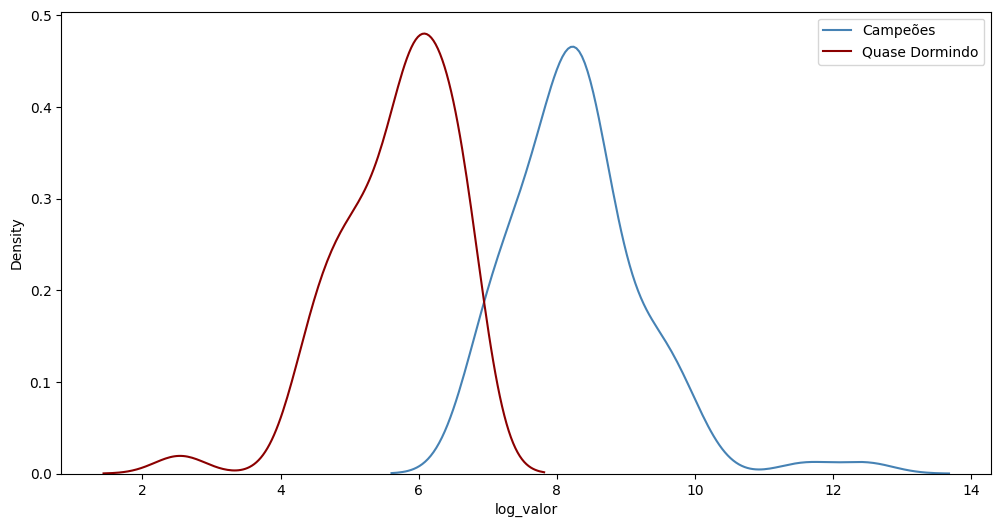

In [22]:
# Vamos comparar as médias do valor gasto dos perfis "Campeões" e "Quase Dormindo"

campeoes = rfv[rfv['rfv_perfil'] == 'Campeões']
campeoes['log_valor'] = np.log(campeoes['valor'])
campeoes = campeoes[campeoes['log_valor'] > 0]

quase_dormindo = rfv[rfv['rfv_perfil'] == 'Quase Dormindo']
quase_dormindo['log_valor'] = np.log(quase_dormindo['valor'])
quase_dormindo = quase_dormindo[quase_dormindo['log_valor'] > 0]

plt.figure(figsize=(12, 6))

sns.kdeplot(campeoes['log_valor'], color='steelblue', label='Campeões')

sns.kdeplot(quase_dormindo['log_valor'], color='darkred', label='Quase Dormindo')

plt.legend()

plt.show()

In [23]:
# Comparação das médias
("Média Campeões:",round(campeoes['log_valor'].mean(),3),"Média Quase dormindo:",
round(quase_dormindo['log_valor'].mean(),3))

('Média Campeões:', 8.298, 'Média Quase dormindo:', 5.688)

##### Interpretação do resultado

Temos como hipóteses:
Hipóteste Nula:

$H_0:$ $\mu_{Campeoes} = \mu_{quase-dormindo}$

Hipótese Alternativa:

$H_1:$ $\mu_{Campeoes} > \mu_{quase-dormindo}$

A um nível de significância $\alpha =0,05$, rejeitamos a hipótese nula, de que as duas médias são iguais, em favor da hipóteste alternativa.

In [24]:
# Cálculo do teste T
stats.ttest_ind(campeoes['log_valor'], quase_dormindo['log_valor'], alternative= 'greater')

TtestResult(statistic=16.619569779689286, pvalue=2.0230351638539508e-35, df=142.0)

### 3. Cálculo de probabilidades

Vamos utilizar os dados de clientes para calcular a probabilidade de idade dos clientes.

É importante ressaltar que os dados do data frame **df_gold** estão segmentados por venda, o que indica que os dados de cliente estão todos duplicados, vamos criar um outro data frame **df_clientes** com apenas os dados de clientes.

In [25]:
df_clientes = df_gold.groupby(['Customer.ID', 'customer.name', 'customer.e.mail', 'country', 'age', 'annual.Salary', 'credit.card.debt', 'net.worth']).first().reset_index()
df_clientes.head(5)

,Customer.ID,customer.name,customer.e.mail,country,age,annual.Salary,credit.card.debt,net.worth,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,gender,client_id,rfv_perfil
0,12348,"Kim, Claudia W.",sit.amet@dignissimmagnaa.edu,Macao,44,63305.84963,16146.770160,749016.5650,524140,21213,PACK OF 72 SKULL CAKE CASES,24,2010-09-27 14:59:00,0.55,0,12348,Promissor
1,12349,Piper,erat.neque@mattisvelitjusto.org,Malawi,40,40727.39196,9725.549901,508528.9957,C490283,22072,TEA CUP AND SAUCER RETRO SPOT,-1,2009-04-12 12:49:00,3.75,0,12349,Campeões
2,12361,"Little, Hayley R.",nunc.est@purusmaurisa.co.uk,Cayman Islands,40,79444.01301,11620.107900,627086.6563,495719,21559,STRAWBERRY LUNCHBOX WITH CUTLERY,6,2010-01-26 14:37:00,2.55,1,12361,Quase Dormindo
3,12375,Abra D. Golden,odio@Duis.com,Poland,53,65834.56889,15353.257740,152012.3530,565333,84997D,CHILDRENS CUTLERY POLKADOT PINK,8,2011-02-09 14:23:00,4.15,0,12375,Novos
4,12410,Quinlan U. Sears,magna@velarcueu.ca,Canada,40,59060.08664,5841.612044,136346.3069,516935,POST,POSTAGE,2,2010-07-25 13:26:00,40.00,1,12410,Promissor


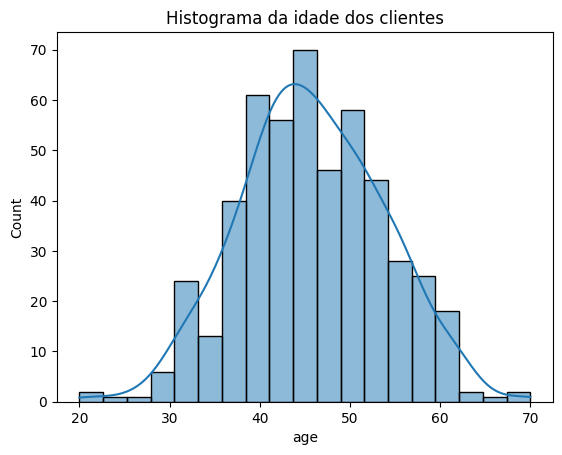

In [26]:
# Histograma da idade

sns.histplot(df_clientes['age'], kde= True)
plt.title('Histograma da idade dos clientes')
plt.show()

Vamos calcular a probabilidade de um cliente ter uma idade maior que 46 anos.

$$ P(Idade>46) = \frac{X>46}{\Omega} $$

In [27]:
# De maneira empírica

sum(df_clientes['age']>46) / len(df_clientes['age'])

0.4497991967871486

In [28]:
# Média
mu = np.mean(df_clientes['age'])
# Desvio padrão
sd = np.std(df_clientes['age'])

# Dados simulados de uma normal

age_normal = np.random.normal(mu, sd, 1000)

age_normal

array([53.33910837, 48.2095942 , 58.57376513, 40.83626326, 68.23658764,
       34.48085764, 44.38613339, 40.48231799, 41.52116135, 61.44357511,
       58.96163432, 50.84933396, 34.14569143, 40.93049668, 58.50790119,
       46.72851308, 46.79320852, 37.24822346, 47.72298329, 59.67429394,
       60.86520346, 55.97956245, 54.55965979, 50.06790296, 37.59066546,
       46.55850398, 30.58721914, 38.40196309, 44.14973473, 45.17413643,
       44.03523421, 24.32617363, 43.41332943, 50.30160334, 48.55284114,
       45.31412554, 42.46729187, 23.86482455, 48.2073747 , 38.73388113,
       45.17706025, 34.92998631, 50.51702461, 47.68827975, 45.07577585,
       45.49529869, 43.45596786, 34.90746033, 50.65213614, 42.94124944,
       49.90860344, 45.19947556, 58.61259039, 46.9463446 , 42.12576458,
       49.28517046, 52.16731564, 55.88959314, 59.74413185, 40.21646575,
       59.5175061 , 45.79030231, 46.75494485, 43.18255586, 46.36871485,
       28.31177814, 53.15184384, 50.51939012, 49.39951975, 33.73

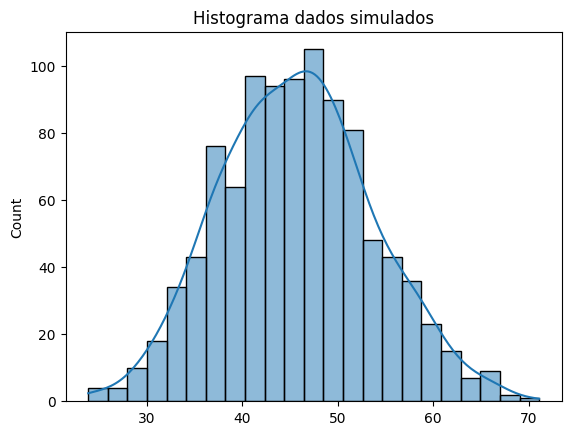

In [29]:
sns.histplot(age_normal, kde= True)
plt.title('Histograma dados simulados')
plt.show()

Podemos calcular com base na distribuição normal

In [30]:
1 -stats.norm.cdf(46, mu, sd)

0.487974366442287

### 3. Intervalo de Confiança

Vamos calcular um intervalo de confiança para a idade dos clientes, para isso vamos gerar uma amostra de 50 clientes.

#### Amostra

Vamos gerar uma amostra de 50 clientes de forma aleatória e sem reposição.

In [31]:
# amostra
amostra_idades = np.random.choice(df_clientes['age'], 50, replace = False)
amostra_idades

array([47, 44, 40, 57, 50, 50, 36, 39, 40, 43, 32, 46, 43, 57, 55, 43, 42,
       33, 57, 41, 49, 47, 37, 51, 40, 41, 55, 55, 39, 39, 28, 56, 32, 39,
       51, 62, 39, 44, 45, 36, 52, 33, 65, 37, 22, 48, 39, 59, 41, 46],
      dtype=int64)

In [32]:
# Vamos comparar a verdadeira média com a média da amostra

(np.mean(amostra_idades), mu)

(44.44, 45.75903614457831)

#### IC de 95% para média de idade

Erro padrão : $$EP = \frac{\hat\sigma}{\sqrt n}$$ onde $$\hat\sigma^2 = \sum_{i=1}^{n}  \frac{(x_i - \bar x )^2}{n-1}$$ e que $$\sigma = \sqrt \sigma^2$$

#### Interpretação

Há uma probabilidade de 95% do intervalo conter a verdadeira média.

In [33]:
erro_padrao = np.std(amostra_idades) / np.sqrt(len(amostra_idades))
stats.norm.interval(0.95, loc= np.mean(amostra_idades), scale = erro_padrao)

(41.953294584290624, 46.92670541570937)

#### Simulação de ICs
Para fins de verificação da suposição de 95% de confiança, vamos simular 1000 repetições e verificar se 95% deles contém a verdadeira média dos dados.

In [34]:
# Simulação nível de confiança

#Número de repetições
n = 1000

#simular n intervalos
ic_s = np.zeros(n)
ic_i = np.zeros(n)
respostas = np.zeros(n)
for i in range(n):
    amostra_idades = np.random.choice(df_clientes['age'], 50, replace = False)
    erro_padrao = np.std(amostra_idades) / np.sqrt(len(amostra_idades))
    ic_s[i]= stats.norm.interval(0.95, loc= np.mean(amostra_idades), scale = erro_padrao)[1]
    ic_i[i]= stats.norm.interval(0.95, loc= np.mean(amostra_idades), scale = erro_padrao)[0]
    if np.mean(df_clientes['age'])>= ic_i[i] and np.mean(df_clientes['age'])<= ic_s[i]:
        respostas[i] = 1
    else:
        respostas[i] = 0

In [35]:
# 95% deles contém a verdadeira média
str(round(sum(respostas) / len(respostas),3) *100 ) + '%'

'95.0%'